<a href="https://colab.research.google.com/github/MrsIgnis/MMO_tasks/blob/main/MMO_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Предоработка данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('/content/pokemon.csv')

df = df.drop('#', axis=1) # Удаляю столбец #, это индексы
df = df.drop('Name', axis=1) # Удаляю столбец Name

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(2)
memory usage: 63.4+ KB


In [4]:
category_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.700000,0.192913,0.513514,0.644444,0.489130,0.619048,0.257143,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.866667,0.192913,0.837838,0.466667,0.815217,0.428571,0.600000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.700000,0.311024,0.567568,0.244444,0.760870,0.523810,0.371429,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.833333,0.311024,0.837838,0.244444,0.869565,0.523810,0.428571,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
! pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00


# **II. K-means**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization(X, max_clusters=10, max_iterations=50):

    # преобразуем X в numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_kmeans_iteration(X, centroids, labels=None, step=0):
        clear_output(wait=True)
        plt.figure(figsize=(8, 6))
        if labels is not None:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        plt.title(f'K-means Iteration {step}')
        plt.legend()
        plt.show()

    def k_means_interactive(X, k, max_iters):
        np.random.seed(42)
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X, centroids, labels, step)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X, k, max_iters)

    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

# Берем датасет и визуализируем K-means
interactive_kmeans_visualization(df[:100])

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Определяем количество кластеров k
k = 3  # Вы можете изменить это значение в соответствии с вашими данными

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

# Добавляем метки кластеров в исходный DataFrame
df_k_means = df.copy()
df_k_means['Cluster'] = labels

# Вывод статистики по кластерам для каждого признака
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_k_means.groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if k > 1:
    silhouette_avg = silhouette_score(df, labels)
    print(f"\nКоэффициент силуэта для k={k}: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен для k=1")


Статистика по кластерам:

Статистика для признака 'Total':
             mean       std       min   max
Cluster                                    
0        0.425151  0.204968  0.016667  1.00
1        0.401905  0.177751  0.000000  0.75
2        0.428064  0.201176  0.023333  1.00

Статистика для признака 'HP':
             mean       std       min       max
Cluster                                        
0        0.295963  0.121914  0.114173  1.000000
1        0.260911  0.076837  0.114173  0.480315
2        0.261692  0.094802  0.000000  0.744094

Статистика для признака 'Attack':
             mean       std       min       max
Cluster                                        
0        0.393976  0.179573  0.000000  0.945946
1        0.368726  0.137192  0.118919  0.686486
2        0.405664  0.178220  0.027027  1.000000

Статистика для признака 'Defense':
             mean       std       min   max
Cluster                                    
0        0.268889  0.113836  0.000000  0.60
1      

Анализ кластеров:

1) Судя по графику, жёлтый кластер более удалённо по параметрам от зелёного и фиолетового расположен (значит последние 2 совпадают по признакам);

2) Исходя из пункта 1 и статистики всех параметров я могу сделать вывод, что жёлтый кластер - это 1 группа, потому что в большинстве признаков по типу её значения отсутствуют (все показатели = 0);

3) Нет чёткой разницы между фиолетовой и зелёной группами. По графику даже сами точки их переплетаются между собой и непонятно, где какой центроид к какому кластеру принадлежит. По параметрам статистики у 0 и 2 группы тоже относительно схожие показатели (разница буквально в пару - тройку единиц). Исходя из этого можно сделать вывод, что программа разделяла в большинстве случаев по типам покемонов;

4) Невооружённым взглядом можно заметить, что фиолетовых точек всё-таки чуть больше, чем зелёных. Да и судя по статистике метрики 2 класса чуть больше, чем 0. Значит, покемоны в кластере 2 самые мощные по характеристикам;

5) Заметила, что были такие типы покемонов, как Type 2_Electric, Type 1_Flying, Type 2_Fire и ещё несколько других, в которых находились только точки из 2 кластера (параметры 0 и 1 групп были = 0). Значит, представители последних двух групп вообще не обладают такими типами покемонов.

Коэффициент силуэта для k=3: 0.1013 => довольно плохое разделение между объектами разных кластеров (как уже было видно по графику заметной разницы между 0 и 2 группой нет, а 1 кластер редко встречается).

# **III. DBSSCAN**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def interactive_dbscan_visualization(X):
    if isinstance(X, pd.DataFrame):
        X = X.values

    def plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для настройки параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                                       value='euclidean', description='metric:')

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider, 'metric': metric_dropdown})
    display(ui, out)

# Пример использования
interactive_dbscan_visualization(df[:120])

Output()

Количество кластеров: 8
Статистика по кластерам:

Статистика для признака 'Total':
             mean       std       min       max  count
Cluster                                               
0        0.372778  0.138165  0.200000  0.575000      9
1        0.379792  0.165497  0.116667  0.625000     16
2        0.353605  0.153833  0.033333  0.700000     49
3        0.340033  0.154100  0.058333  0.558333     51
4        0.256042  0.093800  0.155000  0.430000      8
5        0.244630  0.115183  0.041667  0.375000      9
6        0.320556  0.141315  0.066667  0.580000     21
7        0.243125  0.070099  0.175000  0.350000      8

Статистика для признака 'HP':
             mean       std       min       max  count
Cluster                                               
0        0.241032  0.054899  0.173228  0.311024      9
1        0.218258  0.061110  0.145669  0.350394     16
2        0.233408  0.086297  0.074803  0.507874     49
3        0.264474  0.077669  0.114173  0.429134     51
4     

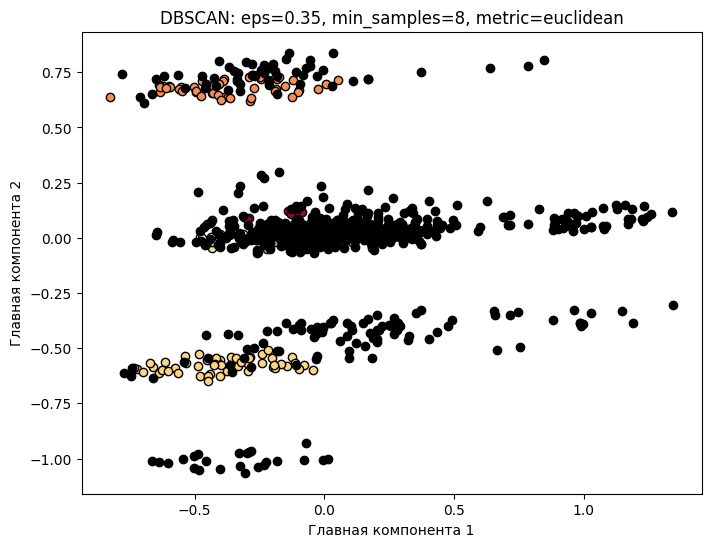

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Параметры DBSCAN
eps = 0.35
min_samples = 8
metric = 'euclidean'

# Обучение модели DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
labels = db.fit_predict(df)

# Добавляем метки кластеров в DataFrame
df_dbscan = df.copy()
df_dbscan['Cluster'] = labels

# Количество кластеров (исключая шум)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Количество кластеров: {n_clusters_}")

# Вывод статистики по кластерам
print("Статистика по кластерам:")
for column in df.columns:
    print(f"\nСтатистика для признака '{column}':")
    cluster_stats = df_dbscan[df_dbscan['Cluster'] != -1].groupby('Cluster')[column].agg(['mean', 'std', 'min', 'max', 'count'])
    print(cluster_stats)

# Вычисление коэффициента силуэта
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(df[df_dbscan['Cluster'] != -1], labels[df_dbscan['Cluster'] != -1])
    print(f"\nКоэффициент силуэта для DBSCAN: {silhouette_avg:.4f}")
else:
    print("\nКоэффициент силуэта не определен, так как найден один кластер или данные являются шумом.")


# Визуализация результатов (с использованием PCA для снижения размерности)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    if k == -1:
        # Черный цвет для шума
        col = [0, 0, 0, 1]
    plt.plot(df_pca.loc[class_member_mask, 'PC1'],
             df_pca.loc[class_member_mask, 'PC2'],
             'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, metric={metric}')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

Анализ кластеров:

1) Изначально он мне разбил на 26 кластеров, большую часть которых просто не видно было на графике из-за наложившихся на них точек других групп. Да и по статистике тоже что-то конкретное сложно сказать. Только по признаков параметров (не типов) было какое-то распределение между кластерами. В поколении 24 и 25 кластеры практически всегда встречались (mean = 1 у обеих групп). А вот по типам сложно было определить, где какой кластер на графике, потому что из 26 кластеров у каждого типа по 1 группе только были данные;

2) Поэксперементировав с разными параметрами, я поняла, что меньше 8 кластеров не получается (ну, хотя бы не 26);

3) Судя по графику, то явно выделяются только 3 кластера (в особенности тот, что чёрного цвета);

4) Как и с предыдущими параметрами модели по типам невозможно определить, где какой класс, да и по статам явных отличий нет, разве что 0 и 1 обладают наибольшими характеристиками и частотой появления (и могу предположить, что чёрный кластер - это всё-таки 1 группа, если смотреть на максимальные значения и количество найденных представителей);

5) Как по мне, то лучше для этого датасета сработал K-means. DBSSCAN слишком огромное количество кластеров создаёт, большая часть из которых просто не видна на графике (из-за того, что есть такой показатель, как тип покемонов).

Коэффициент силуэта для DBSCAN: 0.6510 => но что касается разделения между кластерами, то тут лучше себя показала эта модель. Хоть и чёрный кластер практически перекрывает остальные, но его данные не смешаны с другими группами и видно более чёткое разделение между точками.

# **IV. Метрики качества кластеризации**

In [22]:
# Кластеризация K-means

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Индекс Калински-Харабаза
ch_score_kmeans = calinski_harabasz_score(df, labels_kmeans)
print(f"Индекс Калински-Харабаза для K-means: {ch_score_kmeans:.4f}")

# Индекс Дэвиса-Болдина
db_score_kmeans = davies_bouldin_score(df, labels_kmeans)
print(f"Индекс Дэвиса-Болдина для K-means: {db_score_kmeans:.4f}")

# Коэффициент силуэта
sh_score_kmeans = silhouette_score(df, labels_kmeans)
print(f"Коэффициент силуэта для K-means: {sh_score_kmeans:.4f}")

Индекс Калински-Харабаза для K-means: 54.8476
Индекс Дэвиса-Болдина для K-means: 2.4824
Коэффициент силуэта для K-means: 0.1013


Анализ метрик:

1) Индекс Калински-Харабаза для K-means: 54.8476 => довольно нормальное разделение между кластерами (хотя я бы поспорила насчёт того, где расположены центроиды у зелёного и фиолетового кластеров и то, что их данные смешаны всё-таки на графике);

2) Индекс Дэвиса-Болдина для K-means: 2.4824 => среднее сходство между кластерами присутствует, судя по получившемуся значению. Это видно, опять же, по зелёной и фиолетовой группам;

3) Коэффициент силуэта для K-means: 0.1013 => ну, тут всё-таки значение ближе к 0, поэтому объекты кластеров довольно похожи на кластеры друг друга (по графику данные смешаны).

In [23]:
# Кластеризация DBSSCAN

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(df)

# Исключаем шумовые точки (метки -1)
mask = labels_dbscan != -1
df_scaled_dbscan = df[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Проверяем, есть ли достаточное количество кластеров для расчета метрик
if len(set(labels_dbscan_filtered)) > 1:
    # Индекс Калински-Харабаза
    ch_score_dbscan = calinski_harabasz_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Калински-Харабаза для DBSCAN: {ch_score_dbscan:.4f}")

    # Индекс Дэвиса-Болдина
    db_score_dbscan = davies_bouldin_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Индекс Дэвиса-Болдина для DBSCAN: {db_score_dbscan:.4f}")

    # Коэффициент силуэта
    sh_score_dbscan = silhouette_score(df_scaled_dbscan, labels_dbscan_filtered)
    print(f"Коэффициент силуэта для DBSCAN: {sh_score_dbscan:.4f}")
else:
    print("Недостаточно кластеров для вычисления метрик для DBSCAN.")

Индекс Калински-Харабаза для DBSCAN: 95.5357
Индекс Дэвиса-Болдина для DBSCAN: 0.7809
Коэффициент силуэта для DBSCAN: 0.5014


Анализ метрик:

1) Индекс Калински-Харабаза для DBSCAN: 95.5357 => довольно хорошее разделение между кластерами (даже выше, чем у K-means, ведь в этом чёрный кластер хоть и перекрывает большинство остальных, но его данные не смешаны, к примеру, с жёлтой и красной группой);

2) Индекс Дэвиса-Болдина для DBSCAN: 0.7809 => среднее сходство между кластерами присутствует, судя по получившемуся значению. Это видно, опять же, статистике, где все признаки, не считая типов покемонов, показывают схожие значения у параметров;

3) Коэффициент силуэта для DBSCAN: 0.5014 => в этой модели гораздо лучше идёт разделение объектов по кластерам, несмотря на то, что на графике явно не видно остальные группы, но те, которые не скрыты, довольно хорошо сгруппированы и практически не смешаны с остальными представителями кластеров.

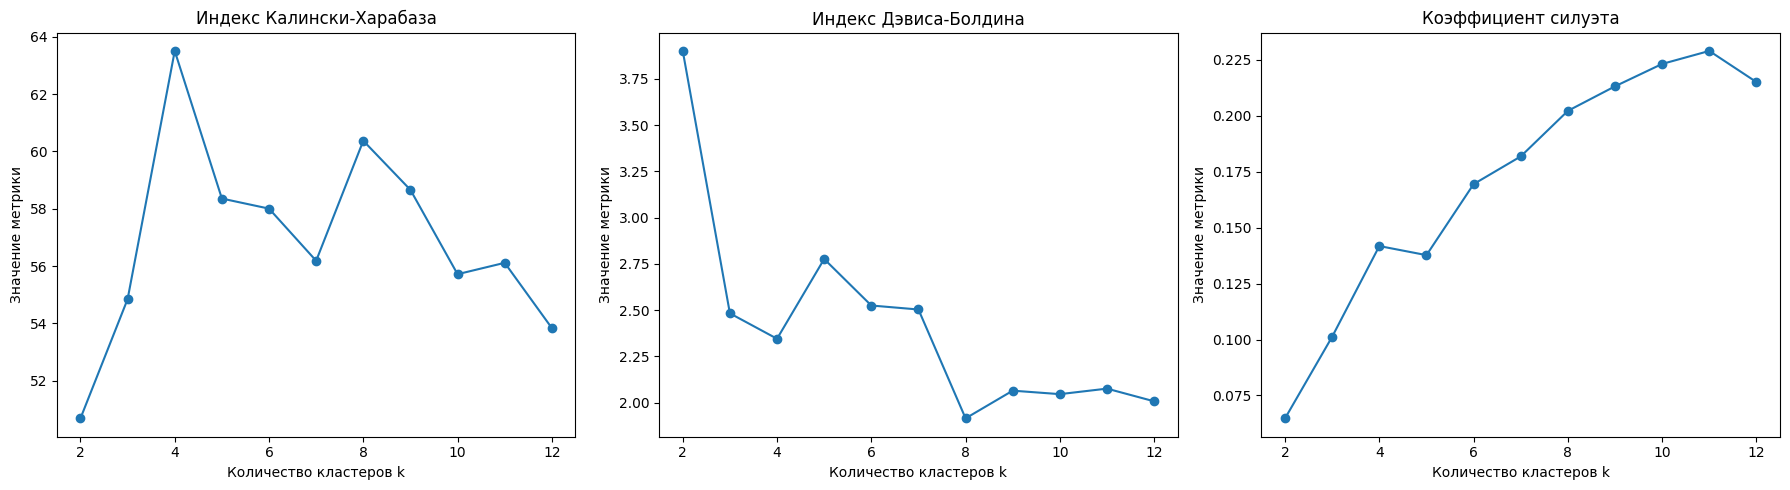

In [24]:
# Диапазон значений k
k_range = range(2, 13)

# Списки для хранения метрик
ch_scores = []
db_scores = []
silhouette_scores = []

for k in k_range:
    # Создаем и обучаем модель KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(df, labels)
    db_score = davies_bouldin_score(df, labels)
    silhouette_avg = silhouette_score(df, labels)

    # Сохраняем метрики
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    silhouette_scores.append(silhouette_avg)

# Построение графиков
plt.figure(figsize=(18, 5))

# График Индекса Калински-Харабаза
plt.subplot(1, 3, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаза')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Индекса Дэвиса-Болдина
plt.subplot(1, 3, 2)
plt.plot(k_range, db_scores, marker='o')
plt.title('Индекс Дэвиса-Болдина')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

# График Коэффициента силуэта
plt.subplot(1, 3, 3)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров k')
plt.ylabel('Значение метрики')

plt.tight_layout()
plt.show()